## Question 1.1

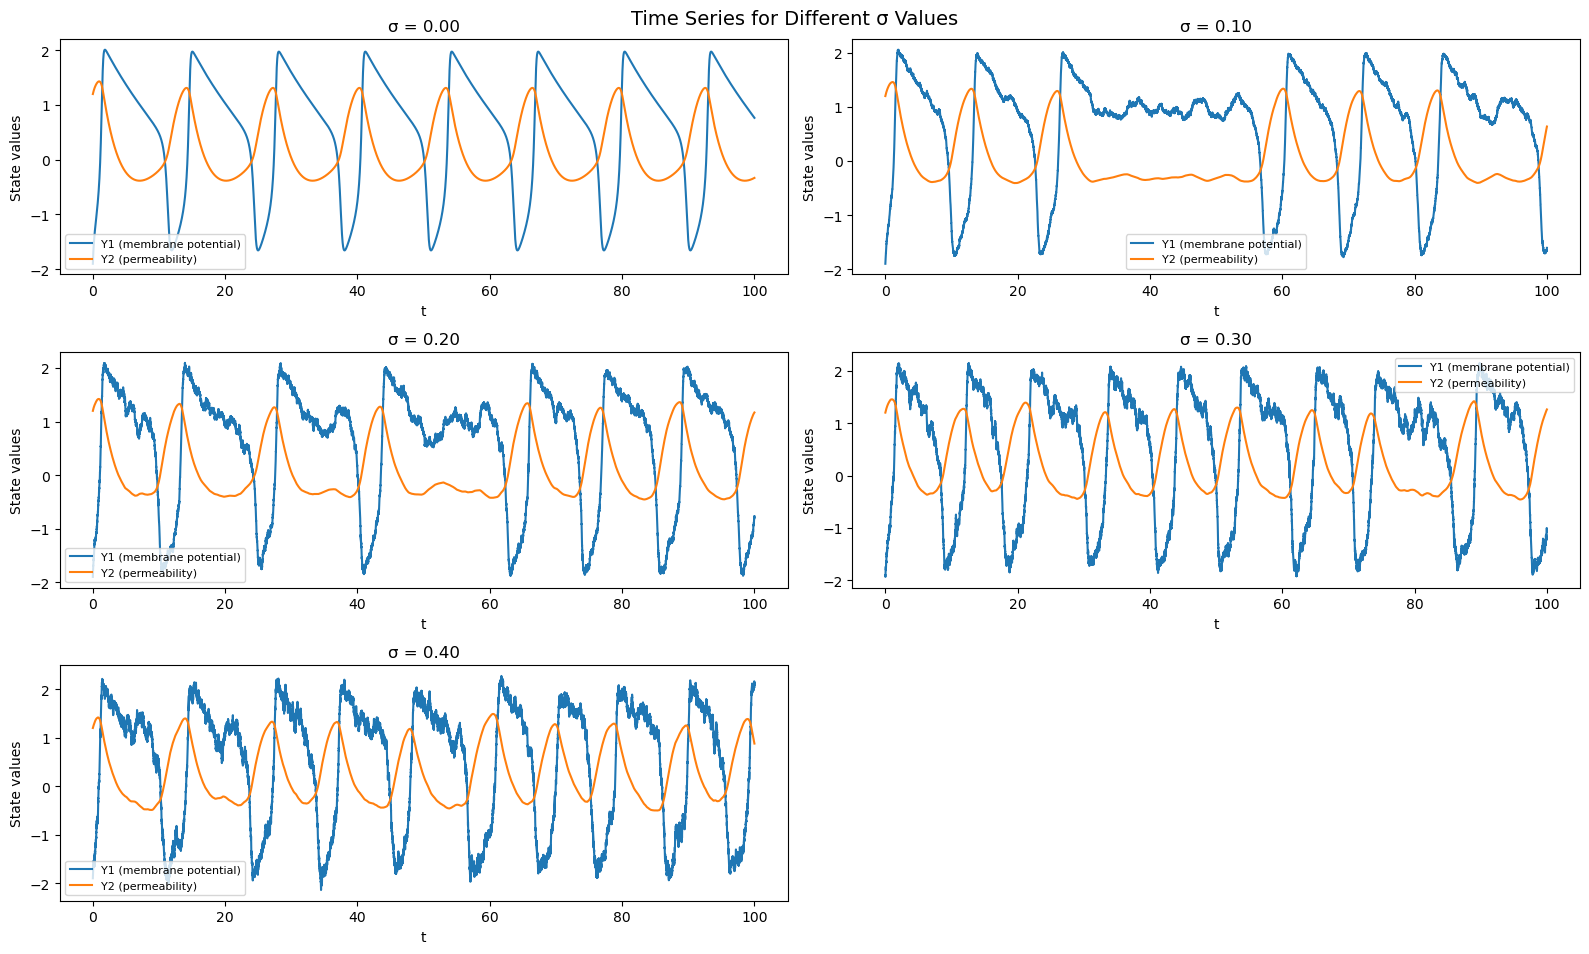

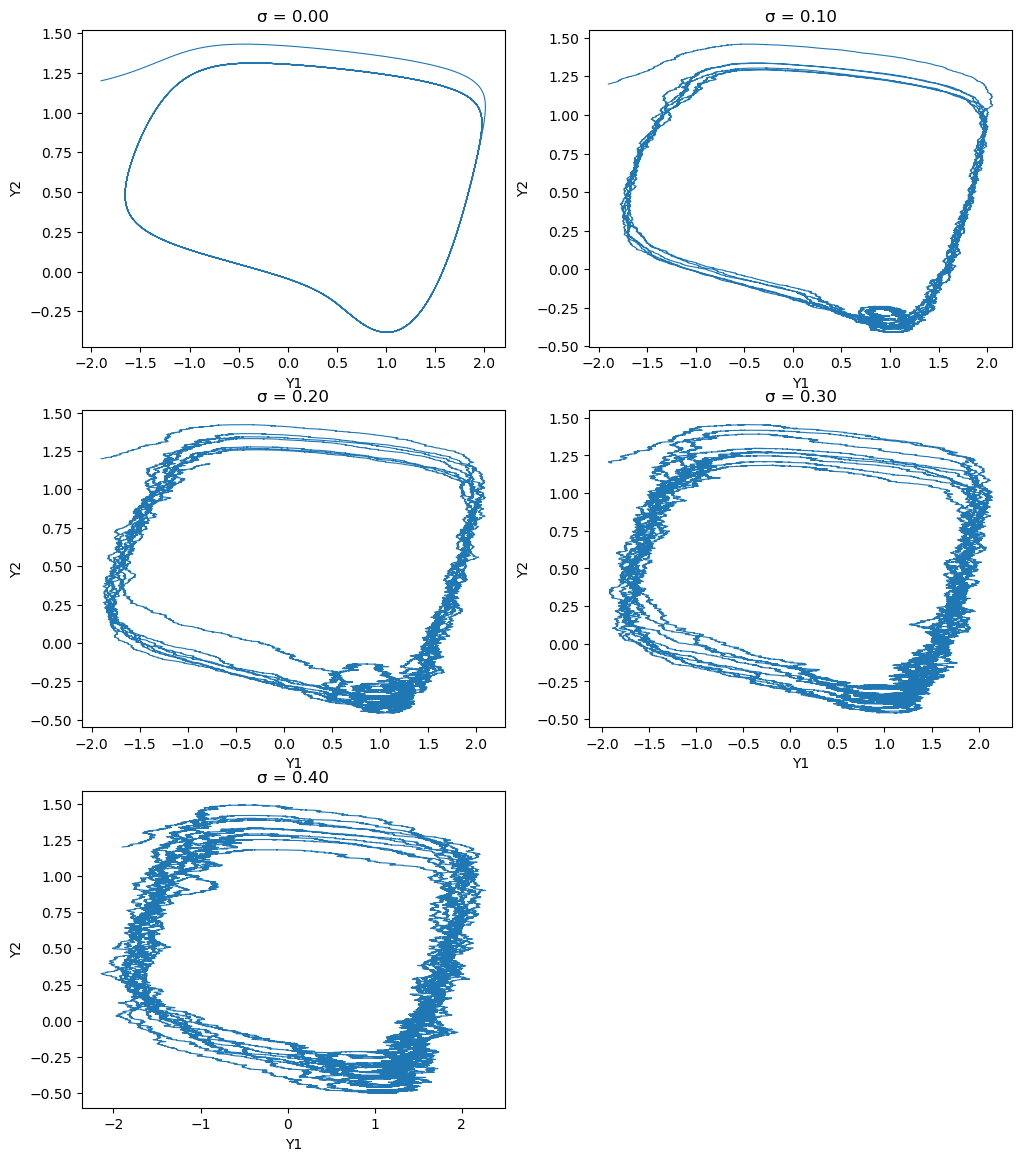

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
theta1 = 0.7
theta2 = 0.8
theta3 = 3.0
theta4 = -0.34
T = 100.0
Delta = 2**-9           # step size = 1/512
N = int(T / Delta)      # 51200 total steps to reach T with step size Delta
t = np.linspace(0, T, N + 1)
y10 = -1.9
y20 = 1.2
sigmas = [0.0, 0.10, 0.20, 0.30, 0.40]

# Random number generator
rng = np.random.default_rng(7)

def simulate_sigma(sigma):
    """Simulate Y1,Y2 for given sigma using Euler–Maruyama scheme."""
    y1 = np.empty(N + 1)
    y2 = np.empty(N + 1)
    y1[0], y2[0] = y10, y20

    sqrtDelta = np.sqrt(Delta)
    if sigma > 0:
        dW = rng.normal(0.0, sqrtDelta, size=N)
    else:
        dW = np.zeros(N)

    for n in range(N):
        drift1 = theta3 * (y1[n] + y2[n] - (1/3.0) * y1[n]**3 + theta4)
        drift2 = -(1/theta3) * (y1[n] + theta2 * y2[n] - theta1)

        y1[n + 1] = y1[n] + drift1 * Delta + sigma * dW[n]
        y2[n + 1] = y2[n] + drift2 * Delta

    return y1, y2

# Simulate for all sigmas
results = {}
for s in sigmas:
    y1, y2 = simulate_sigma(s)
    results[s] = (y1, y2)


fig_ts, axes_ts = plt.subplots(3, 2, figsize=(16, 10))
fig_phase, axes_phase = plt.subplots(3, 2, figsize=(12, 14))

# Flatten axes arrays for easy looping
axes_ts = axes_ts.flatten()
axes_phase = axes_phase.flatten()

for i, s in enumerate(sigmas):
    y1, y2 = results[s]

    # Time series subplot
    ax_ts = axes_ts[i]
    ax_ts.plot(t, y1, label="Y1 (membrane potential)")
    ax_ts.plot(t, y2, label="Y2 (permeability)")
    ax_ts.set_title(f"σ = {s:.2f}")
    ax_ts.set_xlabel("t")
    ax_ts.set_ylabel("State values")
    ax_ts.legend(fontsize=8)

    #Phase plot subplot
    ax_ph = axes_phase[i]
    ax_ph.plot(y1, y2, linewidth=0.8)
    ax_ph.set_title(f"σ = {s:.2f}")
    ax_ph.set_xlabel("Y1")
    ax_ph.set_ylabel("Y2")

# Hide any unused subplots (since we only have 5 σ values)
for j in range(len(sigmas), len(axes_ts)):
    fig_ts.delaxes(axes_ts[j])
    fig_phase.delaxes(axes_phase[j])

fig_ts.suptitle("Time Series for Different σ Values", fontsize=14, y=0.95)
fig_ts.tight_layout()
fig_ts.subplots_adjust(top=0.92)
plt.show()

fig_phase.suptitle("Phase Plots for Different σ Values", fontsize=12, y=0.95)

fig_phase.tight_layout(pad=3.0, h_pad=5.0, w_pad=2.0)
fig_phase.subplots_adjust(top=0.92)
plt.show()



## Question 1.2

In [24]:
data = results[0.1]
y_1 = data[0]
y_2 = data[1]



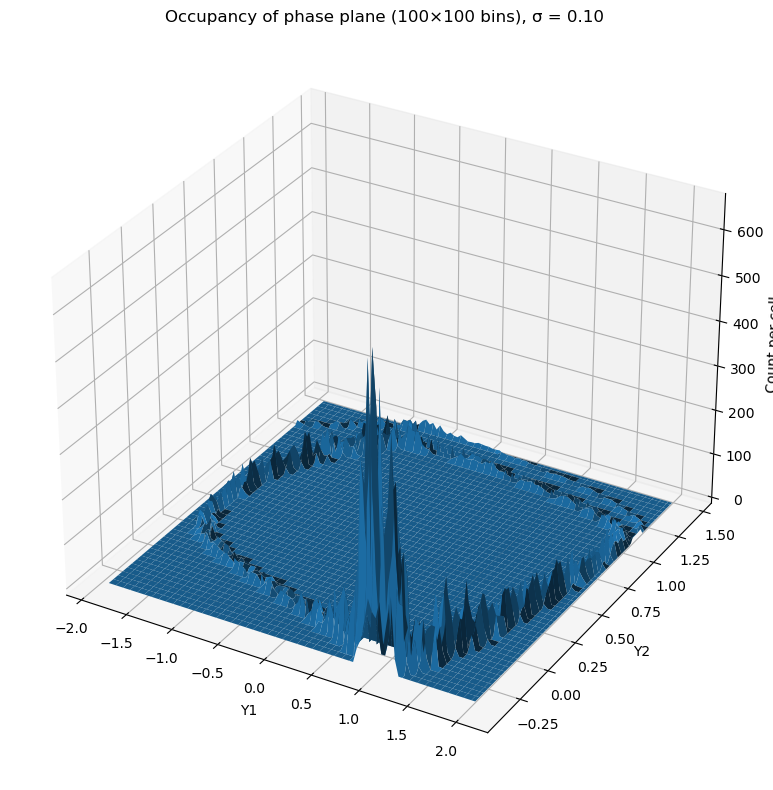

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
simga = 0.1
data = results[simga]
y_1 = data[0]
y_2 = data[1]

# 100x100 2D histogram (counts per cell)
bins = 100
#pad = 0.02  # slight padding of the box
x_min, x_max = y_1.min(), y_1.max()
y_min, y_max = y_2.min(), y_2.max()
#x_range = (x_min - pad*(x_max-x_min), x_max + pad*(x_max-x_min))
#y_range = (y_min - pad*(y_max-y_min), y_max + pad*(y_max-y_min))
x_range = (x_min , x_max )
y_range = (y_min , y_max )
H, xedges, yedges = np.histogram2d(y_1, y_2, bins=bins, range=[x_range, y_range])

# Grid for surface plot (use bin centers)
xc = 0.5 * (xedges[:-1] + xedges[1:])
yc = 0.5 * (yedges[:-1] + yedges[1:])
X, Y = np.meshgrid(xc, yc, indexing="xy")
Z = H.T  # align axes with X (Y2 vs Y1)

# 3D surface
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True)
ax.set_title("Occupancy of phase plane (100×100 bins), σ = 0.10")
ax.set_xlabel("Y1")
ax.set_ylabel("Y2")
ax.set_zlabel("Count per cell")
plt.tight_layout()
plt.show()

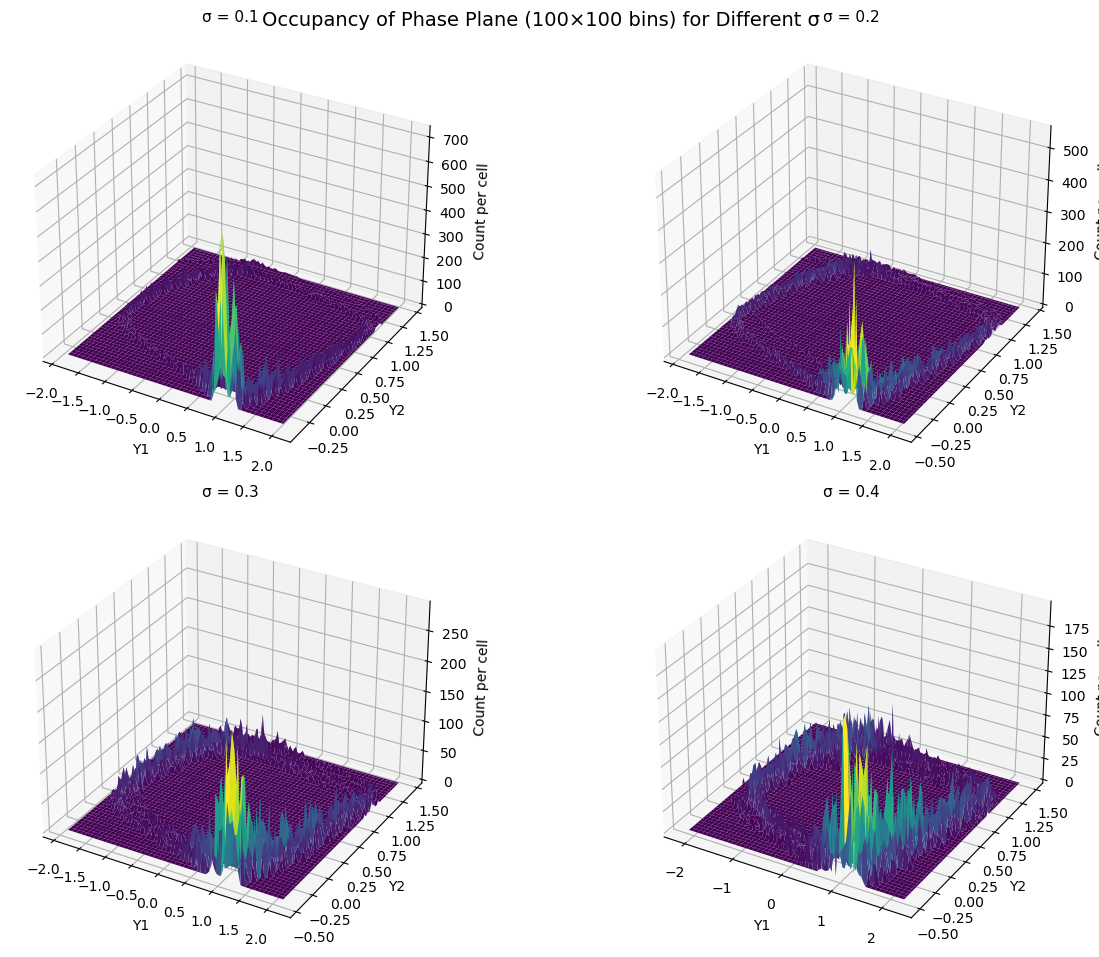

In [27]:
sigmas = [0.1, 0.2, 0.3, 0.4]
bins = 100

fig = plt.figure(figsize=(14, 10))
axes = []

for i, sigma in enumerate(sigmas):
    y1, y2 = results[sigma]
    
    # Histogram (100x100 grid)
    x_min, x_max = y1.min(), y1.max()
    y_min, y_max = y2.min(), y2.max()
    H, xedges, yedges = np.histogram2d(y1, y2, bins=bins, range=[(x_min, x_max), (y_min, y_max)])
    
    # Grid centers
    xc = 0.5 * (xedges[:-1] + xedges[1:])
    yc = 0.5 * (yedges[:-1] + yedges[1:])
    X, Y = np.meshgrid(xc, yc, indexing="xy")
    Z = H.T  # transpose for correct alignment
    
    # Subplot position (2x2 grid)
    ax = fig.add_subplot(2, 2, i + 1, projection="3d")
    axes.append(ax)
    
    # Surface plot
    surf = ax.plot_surface(X, Y, Z, cmap="viridis", linewidth=0, antialiased=True)
    ax.set_title(f"σ = {sigma}", fontsize=11)
    ax.set_xlabel("Y1")
    ax.set_ylabel("Y2")
    ax.set_zlabel("Count per cell")
    
    # Optional: consistent z-axis range across plots
    ax.set_zlim(0, np.max(Z) * 1.1)

fig.suptitle("Occupancy of Phase Plane (100×100 bins) for Different σ", fontsize=14, y=0.95)
plt.tight_layout()
plt.show()